In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
trueStateValue = np.array([0,1/6, 2/6, 3/6, 4/6, 5/6,0])
estimatedStateValueTD = np.zeros(7)+0.5
estimatedStateValueTD[0] = 0
estimatedStateValueTD[6] = 0
estimatedStateValueMC = np.zeros(7) + 0.5
estimatedStateValueMC[0] = 0
estimatedStateValueMC[6] = 0
alpha = 0.1
numEpisodes = 100
stateTransition = {
    1 : [0, 2],
    2 : [1, 3],
    3 : [2,4],
    4 : [3,5],
    5 : [4,6]
}

## TD(0)

In [3]:
estimatedStateValuesEpisodesTD = {
    0:estimatedStateValueTD.copy()
}

for episode in range(numEpisodes):
    
    state = 3
    while True:
        newState = random.choice(stateTransition[state])
        reward = 0
        if newState == 6 and state == 5:
            reward = 1
        estimatedStateValueTD[state] = estimatedStateValueTD[state] + alpha*(reward + estimatedStateValueTD[newState] - estimatedStateValueTD[state])
        if newState == 6 or newState == 0:
            break
        state = newState
    estimatedStateValuesEpisodesTD[episode+1] = estimatedStateValueTD.copy()
        
        

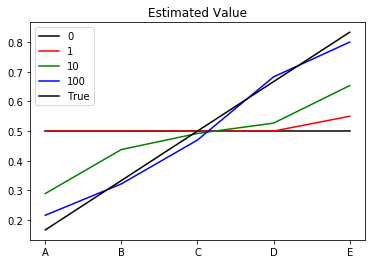

In [4]:
plt.figure()
plt.title('Estimated Value')
plt.plot(estimatedStateValuesEpisodesTD[0][1:6], c='k', label='0')
plt.plot(estimatedStateValuesEpisodesTD[1][1:6], c='r', label='1')
plt.plot(estimatedStateValuesEpisodesTD[10][1:6], c='g', label='10')
plt.plot(estimatedStateValuesEpisodesTD[100][1:6], c='b', label='100')
plt.plot(np.array(trueStateValue)[1:6], c='k', label='True')
plt.legend()
plt.xticks([0,1,2,3,4], ['A','B','C','D','E'])
plt.show()

# RMS ERROR

## TD

In [5]:
errorTDAlpha = []

for alpha in [0.05, 0.10, 0.15]:

    estimatedStateValuesEpisodesTD = {}

    for runs in range(100):

        estimatedStateValueTD = np.zeros(7)+0.5
        estimatedStateValueTD[0] = 0
        estimatedStateValueTD[6] = 0

        for episode in range(numEpisodes):

            state = 3
            while True:
                newState = random.choice(stateTransition[state])
                reward = 0
                if newState == 6 and state == 5:
                    reward = 1
                estimatedStateValueTD[state] = estimatedStateValueTD[state] + alpha*(reward + estimatedStateValueTD[newState] - estimatedStateValueTD[state])
                if newState == 6 or newState == 0:
                    break
                state = newState

            if episode in estimatedStateValuesEpisodesTD:
                estimatedStateValuesEpisodesTD[episode] += estimatedStateValueTD.copy()
            else:
                estimatedStateValuesEpisodesTD[episode] = estimatedStateValueTD.copy()

    for k,v in estimatedStateValuesEpisodesTD.items():
        estimatedStateValuesEpisodesTD[k] /= 100

    errorTD = []

    for k,v in estimatedStateValuesEpisodesTD.items():
        errorTD.append(np.sqrt(np.sum(np.power(estimatedStateValuesEpisodesTD[k] - trueStateValue,2))/5))

    errorTDAlpha.append(errorTD)

## MC

In [6]:
errorMCAlpha = []

for alpha in [0.01, 0.02, 0.03, 0.04]:

    estimatedStateValuesEpisodesMC = {}

    for runs in range(100):

        estimatedStateValueMC = np.zeros(7)+0.5
        estimatedStateValueMC[0] = 0
        estimatedStateValueMC[6] = 0

        for episode in range(numEpisodes):

            stateVisited = [3]
            state = 2
            reward = 0
            while True:
                newState = random.choice(stateTransition[state])
                stateVisited.append(newState)
                if newState == 6 and state == 5:
                    reward = 1
                if newState == 6 or newState == 0:
                    break
                state = newState
            for visit in stateVisited:
                if visit != 6 and visit != 0:
                    estimatedStateValueMC[visit] = estimatedStateValueMC[visit] + alpha*(reward - estimatedStateValueMC[visit])

            if episode in estimatedStateValuesEpisodesMC:
                estimatedStateValuesEpisodesMC[episode] += estimatedStateValueMC.copy()
            else:
                estimatedStateValuesEpisodesMC[episode] = estimatedStateValueMC.copy()

    for k,v in estimatedStateValuesEpisodesMC.items():
        estimatedStateValuesEpisodesMC[k] /= 100

    errorMC = []

    for k,v in estimatedStateValuesEpisodesMC.items():
        errorMC.append(np.sqrt(np.sum(np.power(estimatedStateValuesEpisodesMC[k] - trueStateValue,2))/5))

    errorMCAlpha.append(errorMC)

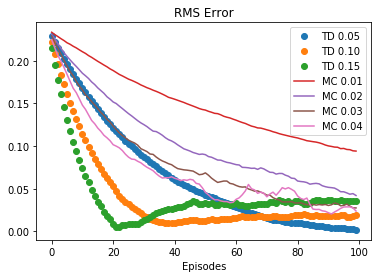

In [7]:
plt.figure()
plt.plot(errorTDAlpha[0], 'o', label='TD 0.05')
plt.plot(errorTDAlpha[1], 'o', label='TD 0.10')
plt.plot(errorTDAlpha[2], 'o', label='TD 0.15')
plt.plot(errorMCAlpha[0], label='MC 0.01')
plt.plot(errorMCAlpha[1], label='MC 0.02')
plt.plot(errorMCAlpha[2], label='MC 0.03')
plt.plot(errorMCAlpha[3], label='MC 0.04')
plt.legend()
plt.title('RMS Error')
plt.xlabel('Episodes')
plt.show()